# Exercise 4: Logistic Regression, Bayes and EM

In this assignment you will implement several algorithms as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in this notebook only. **Do not create Python modules and import them**.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) and pandas. 
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install (1.15.4). Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
7. Write your own code. Cheating will not be tolerated.
8. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw4_123456789_987654321.ipynb` if you submitted in pairs and `hw4_123456789.ipynb` if you submitted the exercise alone.
9. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Implement Logistic Regression algorithm.
1. Implement EM algorithm.
1. Implement Navie Bayes algorithm that uses EM for calculating the likelihood.
1. Visualize your results.

# I have read and understood the instructions: 208274118 and 204879829

In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function for ploting the decision boundaries of a model
# You will use it later
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('.', '.')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Reading the data

In [3]:
training_set = pd.read_csv('training_set.csv')
test_set = pd.read_csv('test_set.csv')
X_training, y_training = training_set[['x1', 'x2']].values, training_set['y'].values
X_test, y_test = test_set[['x1', 'x2']].values, test_set['y'].values

## Visualizing the data
(2 points each - 8 points total)

Plot the following graphs for the training set:

For the first feature only:
1. For the first 1000 data points plot a histogram for each class on the same graph (use bins=20, alpha=0.5).
1. For all the data points plot a histogram for each class on the same graph (use bins=40, alpha=0.5).

For both features:
1. For the first 1000 data points plot a scatter plot where each class has different color
1. For all the data points plot a scatter plot where each class has different color

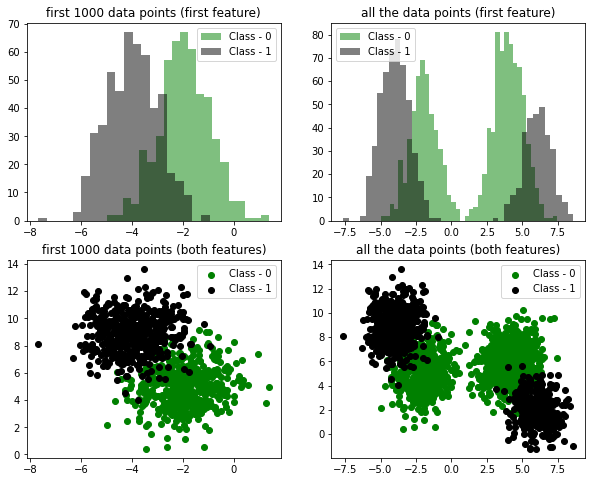

In [4]:
#### Your code here ####

_ , axs = plt.subplots(2, 2)

first_feature_all_0 = [X_training[i][0] for i in range(len(X_training)) if y_training[i] == 0]
first_feature_all_1 = [X_training[i][0] for i in range(len(X_training)) if y_training[i] == 1]
first_feature_1000_0 = [X_training[i][0] for i in range(1000) if y_training[i] == 0]
first_feature_1000_1 = [X_training[i][0] for i in range(1000) if y_training[i] == 1]

second_feature_all_0 = [X_training[i][1] for i in range(len(X_training)) if y_training[i] == 0]
second_feature_all_1 = [X_training[i][1] for i in range(len(X_training)) if y_training[i] == 1]
second_feature_1000_0 = [X_training[i][1] for i in range(1000) if y_training[i] == 0]
second_feature_1000_1 = [X_training[i][1] for i in range(1000) if y_training[i] == 1]

axs[0,0].hist(first_feature_1000_0, 20, facecolor = 'green', alpha = 0.5, label = "Class - 0")
axs[0,0].hist(first_feature_1000_1, 20, facecolor = 'black', alpha = 0.5, label = "Class - 1")

axs[0,1].hist(first_feature_all_0, 40, facecolor = 'green', alpha = 0.5, label = 'Class - 0')
axs[0,1].hist(first_feature_all_1, 40, facecolor = 'black', alpha = 0.5, label = 'Class - 1')

axs[1,0].scatter(first_feature_1000_0, second_feature_1000_0, color = 'green', label = 'Class - 0')
axs[1,0].scatter(first_feature_1000_1, second_feature_1000_1, color = 'black', label = 'Class - 1')

axs[1,1].scatter(first_feature_all_0, second_feature_all_0, color = 'green', label ='Class - 0')
axs[1,1].scatter(first_feature_all_1, second_feature_all_1, color = 'black', label = 'Class - 1')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

axs[0,0].title.set_text("first 1000 data points (first feature)")
axs[0,1].title.set_text("all the data points (first feature)")
axs[1,0].title.set_text("first 1000 data points (both features)")
axs[1,1].title.set_text("all the data points (both features)")

plt.show()

## Logistic Regression

(15 Points)

Implement the Logistic Regression algorithm that uses gradient descent for finding the optimal theta vector. 

Where:
$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

$$
J(\theta)=\frac{1}{m} \sum_{d=1}^{m} - y^{(d)}ln(h_\theta(x^{(d)}) - (1 - y^{(d)})ln(1 - h_\theta(x^{(d)})
$$

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance after the fit function was executed

\* You can add more functions if you think this is necessary

Your model should also store a list of the costs that you've calculated in each iteration

In [5]:
def bias(X):
        
    ones = np.ones(X.shape[0])
    return np.column_stack((ones, X))

def compute_cost(X, y, theta):
        
    left = -1 * np.sum(y * np.log(hypo(theta, X)))
    right = -1 * np.sum((1 - y) * np.log(1 - hypo(theta, X)))
    return (1 / X.shape[0]) * (left + right)
        
def hypo(theta ,X):
        
    return 1.0 / (1.0 + np.exp(-1 * np.dot(X,theta.T)))  

In [6]:
class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    eps : float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random weight
      initialization.
    """
    
    def __init__(self, eta=0.00005, n_iter=10000, eps=0.000001, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.eps = eps
        self.random_state = random_state
        self.theta = []
        self.cost_history = []
        

    def fit(self, X, y):
        """ 
        Fit training data (the learning phase).
        Updating the theta vector in each iteration using gradient descent.
        Store the theta vector in an attribute of the LogisticRegressionGD object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        """

        m = X.shape[0]
        X = bias(X) 
        np.random.seed(self.random_state)
        temp_theta = np.random.random(size=X.shape[1])

        for i in range(self.n_iter):
            hypothesis = hypo(temp_theta,X)
            temp_theta -= (self.eta / m) * np.dot(X.T, (hypothesis - y))
            self.cost_history.append(compute_cost(X, y ,temp_theta))
            if i > 1 and (self.cost_history[i-1] - self.cost_history[i] < self.eps):
                break      
        self.theta = temp_theta
        
    def predict(self, X):
        
        X = bias(X)
        return np.asarray([1 if hypo(X[instance], self.theta) > 0.5 else 0 for instance in range(X.shape[0])])

## Cross Validation

(5 points)

Use 5-fold cross validation in order to find the best eps and eta params from the given lists.

Shuffle the training set before you split the data to the folds.

In [7]:
#### Your code here ####

etas = [0.05, 0.005, 0.0005, 0.00005, 0.000005]
epss = [0.01, 0.001, 0.0001, 0.00001, 0.000001]

# shuffle the data
new_train = training_set.copy().values
np.random.shuffle(new_train)

last_feature_col = new_train.shape[1] - 1
X = new_train[:,0:last_feature_col]
y = new_train[:,-1]

# split the shuffle data and the train data
split_X = np.split(X, 5, axis=0)
split_y = np.split(y, 5, axis=0)
copy_X_train = np.split(X_training.copy(), 5, axis = 0)
copy_y_train = np.split(y_training.copy(), 5, axis = 0)

tuple_list = [(et, ep) for et in etas.copy() for ep in epss.copy()]
best_eta = 0
best_eps = 0
max_acc = 0

for tup in tuple_list:
    mean_acc = 0 
    
    for i in range(5):
        cuurent_len_Xi = len(split_X[i])
        obj = LogisticRegressionGD(eta = tup[0], n_iter = 10000, eps = tup[1], random_state = 1)
        obj.fit(copy_X_train[i], copy_y_train[i])  
        mean_acc += np.sum((obj.predict(split_X[i]) == split_y[i])) / cuurent_len_Xi
    
    mean_acc /= 5
    if mean_acc > max_acc:
        max_acc = mean_acc
        best_eta = tup[0]
        best_eps = tup[1]
        
print("best epsilon :",best_eps)
print("best eta :",best_eta)
        

best epsilon : 1e-06
best eta : 0.05


## Normal distribution pdf

(2 Points)

Implement the normal distribution pdf 
$$
f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}
$$
Write an efficient vectorized code

In [8]:
#### Your code here ####  

def norm_pdf(data, mu, sigma):
    return (1.0 / sigma ) * (1.0 / (2.0 * np.pi) ** 0.5) * np.exp((-1 * (((data - mu) / sigma) ** 2)) / 2.0)

## Expectation Maximization

(15 Points)

Implement the Expectation Maximization algorithm for gaussian mixture model.

The class should hold the distribution params.

Use -log likelihood as the cost function:
$$
cost(x) = \sum_{d=1}^{m}-log(w * pdf(x; \mu, \sigma))
$$

\* The above is the cost of one gaussian. Think how to use the cost function for gaussian mixture.

Your class should contain the following functions:
1. init_params - initialize distribution params
1. expectation - calculating responsibilities
1. maximization - updating distribution params
1. fit - the learning function
1. get_dist_params - return the distribution params

\* You can add more functions if you think this is necessary

Don't change the eps params (eps=0.01)

When you need to calculate the pdf of a normal distribution use the function `norm_pdf` that you implemented above.

In [9]:
class EM(object):
    
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    n_iter : int
      Passes over the training dataset in the EM proccess
    eps: float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1, n_iter=1000, eps=0.01):
        self.k = k
        self.n_iter = n_iter
        self.eps = eps
        self.responsibilities = []
        self.mu = []
        self.sigma = []
        self.w = []

    # initial guesses for parameters
    def init_params(self, data):
        
        """
        Initialize distribution params
        """
        split_data = np.split(data, self.k, axis=0)
        for gaus in range(self.k):
            self.w.append(1 / self.k)
            self.mu.append(np.mean(split_data[gaus]))
            self.sigma.append(np.std(split_data[gaus]))
            
    def expectation(self, data):
        
        """
        E step - calculating responsibilities
        """

        denominator = 0
        self.responsibilities = [[] for gaus in range(self.k)]
        
        for gaus in range(self.k):    
            for row in range(data.shape[0]):
                pdf = self.w[gaus] * norm_pdf(data[row], self.mu[gaus], self.sigma[gaus])                
                self.responsibilities[gaus].append(pdf)
                for k in range(self.k):
                    denominator += self.w[k] * norm_pdf(data[row], self.mu[k], self.sigma[k])
                self.responsibilities[gaus][row] /= denominator
                denominator = 0   
                     
    
    def maximization(self, data):
        
        """
        M step - updating distribution params
        """
        
        N = data.shape[0]
        
        for gaus in range(self.k):
            sum_response1 = sum_response2 = sum_response3 = 0
            
            for row in range(N): 
                sum_response1 += self.responsibilities[gaus][row]
                sum_response2 += self.responsibilities[gaus][row] * data[row]
                
            # calc new weight
            self.w[gaus] = sum_response1 / N
            
            # calc new mu   
            self.mu[gaus] = (sum_response2 / (self.w[gaus] * N))
 
            for row in range(N):
                sum_response3 += self.responsibilities[gaus][row] * (data[row] - self.mu[gaus]) ** 2
            
            # calc new sigma                       
            self.sigma[gaus] = (sum_response3 / (self.w[gaus] * N)) ** 0.5
          
    
    def fit(self, data):
        
        """ 
        Fit training data (the learning phase).
        Use init_params and then expectation and maximization function in order to find params 
        for the distribution. 
        Store the params in attributes of the EM object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.
        """
        
        self.init_params(data)
        current_cost = self.compute_cost(data)
        prev_cost = 0    
        for i in range(self.n_iter):
            self.expectation(data)
            self.maximization(data)
            prev_cost = current_cost
            self.current_cost = self.compute_cost(data)
            if np.absolute(prev_cost - current_cost) < self.eps:
                break
    
    def compute_cost(self, data):
        
        cost = 0
        for gaus in range(self.k):
            for row in range(data.shape[0]):
                cost += -1.0 * np.log(self.w[gaus] * norm_pdf(data[row], self.mu[gaus], self.sigma[gaus]))
        return cost
    
    def get_dist_params(self):
        
        return self.mu, self.sigma, self.w 

## Naive Bayes

(15 Points)

Implement the Naive Bayes algorithm.

For calculating the likelihood use the EM algorithm that you implemented above to find the distribution params. With these params you can calculate the likelihood probability.

Calculate the prior probability directly from the training set.

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance (or instances) after the fit function was executed

\* You can add more functions if you think this is necessary


In [10]:
class NaiveBayesGaussian(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1):
        self.k = k
        self.prior = [0,0]
        self.em_first_feature = [EM(k=self.k) for i in range(2)]
        self.em_second_feature = [EM(k=self.k) for i in range(2)]
   
    def fit(self, X, y):
        """ 
        Fit training data.

        Parameters
        ----------
        X : array-like, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        """
        
        # add zero column for using np.where
        y = np.column_stack([np.zeros_like(y),y])
        
        for class_val in range(2):
            class_data = X[np.where(y[:,-1] == class_val)]
            self.prior[class_val] = len(class_data)/ len(X)
            self.em_first_feature[class_val].fit(class_data[:,0])
            self.em_second_feature[class_val].fit(class_data[:,1])
    
     
    def likelihood(self, x, ind1):

        first_feature_lik = second_feature_lik = 0
                           
        for gaus in range(self.k):
            f1_whigt = self.em_first_feature[ind1].w[gaus]  
            f2_whigt = self.em_second_feature[ind1].w[gaus] 
            f1_mu = self.em_first_feature[ind1].mu[gaus]
            f2_mu = self.em_second_feature[ind1].mu[gaus]
            f1_sigma = self.em_first_feature[ind1].sigma[gaus]
            f2_sigma = self.em_second_feature[ind1].sigma[gaus]
 
            first_feature_lik += f1_whigt * norm_pdf(x[0],f1_mu, f1_sigma)
            second_feature_lik += f2_whigt * norm_pdf(x[1],f2_mu, f2_sigma)
                           
        return first_feature_lik * second_feature_lik
    
    def posterior(self, x, ind2):
       
        return self.likelihood(x,ind2) * self.prior[ind2]
        
    def predict(self, X):

        return np.asarray([0 if self.posterior(X[i],0) > self.posterior(X[i],1) else 1 for i in range(len(X))])


## Model evaluation

(20 points)

In this section you will build 2 models and fit them to 2 datasets

First 1000 training points and first 500 test points:
1. Use the first 1000 points from the training set (take the first original 1000 points - before the shuffle) and the first 500 points from the test set.
1. Fit Logistic Regression model with the best params you found earlier.
1. Fit Naive Bayes model. Remember that you need to select the number of gaussians in the EM.
1. Print the training and test accuracies for each model.
1. Use the `plot_decision_regions` function to plot the decision boundaries for each model (for this you need to use the training set as the input)
1. Plot the cost Vs the iteration number for the Logistic Regression model

Use all the training set points:
1. Repeat sections 2-6 for all the training set points
1. Provide one or two sentences on each graph explaining what you observe in the graph.

#### Don't forget to label your graphs ####

train accuracy in Logistic Regression is : 96.5
test accuracy in Logistic Regression is : 93.8
train accuracy in Naive Bayes is : 96.6
test accuracy in Naive Bayes is : 94.2




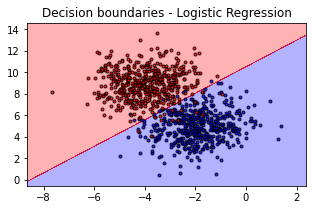

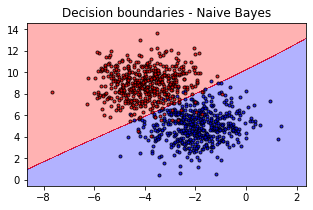

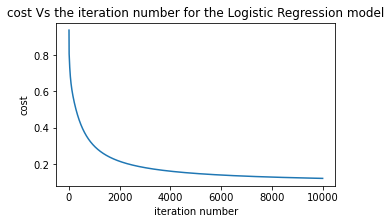

In [11]:
x_trainn = X_training[:1000]
y_trainn = y_training[:1000]
x_testt = X_test[:500]
y_testt = y_test[:500]

Logistic_object = LogisticRegressionGD(eta = best_eta, eps = best_eps)
Logistic_object.fit(x_trainn, y_trainn)
naive_object = NaiveBayesGaussian(k=2)
naive_object.fit(x_trainn, y_trainn)

acc_Logistic_train = 100 - np.count_nonzero(y_trainn - Logistic_object.predict(x_trainn)) / len(x_trainn)*100
acc_Logistic_test = 100 - np.count_nonzero(y_testt - Logistic_object.predict(x_testt)) / len(x_testt)*100

acc_naive_train = 100 - np.count_nonzero(y_trainn - naive_object.predict(x_trainn)) / len(x_trainn)*100
acc_naive_test = 100 - np.count_nonzero(y_testt - naive_object.predict(x_testt)) / len(x_testt)*100

print(f"train accuracy in Logistic Regression is : {acc_Logistic_train}")
print(f"test accuracy in Logistic Regression is : {acc_Logistic_test}")
print(f"train accuracy in Naive Bayes is : {acc_naive_train}")
print(f"test accuracy in Naive Bayes is : {acc_naive_test}")

plt.figure(figsize=(5,3))
plt.title("Decision boundaries - Logistic Regression")
plot_decision_regions(x_trainn, y_trainn, Logistic_object)

print()
plt.figure(figsize=(5,3))
plt.title("Decision boundaries - Naive Bayes")
plot_decision_regions(x_trainn, y_trainn, naive_object)

print()
plt.figure(figsize=(5,3))
plt.title("cost Vs the iteration number for the Logistic Regression model")
plt.plot(np.arange(len(Logistic_object.cost_history)), Logistic_object.cost_history)

plt.xlabel("iteration number")
plt.ylabel("cost")
plt.show()

train accuracy in Logistic Regression is : 79.6
test accuracy in Logistic Regression is : 79.2
train accuracy in Naive Bayes is : 92.1
test accuracy in Naive Bayes is : 90.2




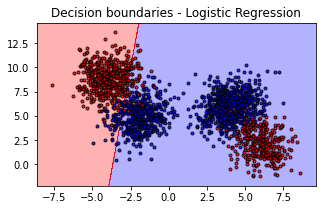

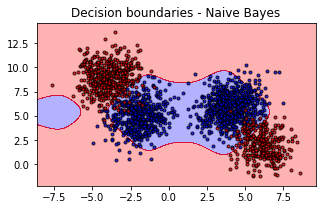

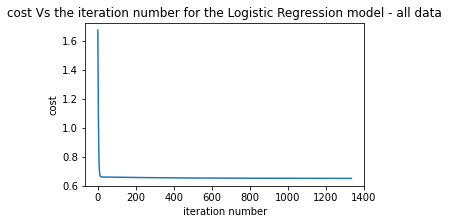

In [12]:
# all data
x_trainn_all = X_training.copy()
y_trainn_all = y_training.copy()
x_testt_all = X_test.copy()
y_testt_all = y_test.copy()

Logistic_object_all = LogisticRegressionGD(eta = best_eta, eps = best_eps)
Logistic_object_all.fit(x_trainn_all, y_trainn_all)
naive_object_all = NaiveBayesGaussian(k = 4)
naive_object_all.fit(x_trainn_all, y_trainn_all)

acc_Logistic_train_all = np.count_nonzero(y_trainn_all - Logistic_object_all.predict(x_trainn_all)) / len(x_trainn_all)*100
acc_Logistic_train_all = 100 - acc_Logistic_train_all

acc_Logistic_test_all = np.count_nonzero(y_testt_all - Logistic_object_all.predict(x_testt_all)) / len(x_testt_all)*100
acc_Logistic_test_all = 100 - acc_Logistic_test_all

acc_naive_train_all = np.count_nonzero(y_trainn_all - naive_object_all.predict(x_trainn_all)) / len(x_trainn_all)*100
acc_naive_train_all = 100 - acc_naive_train_all

acc_naive_test_all = np.count_nonzero(y_testt_all - naive_object_all.predict(x_testt_all)) / len(x_testt_all)*100
acc_naive_test_all = 100 - acc_naive_test_all

print(f"train accuracy in Logistic Regression is : {acc_Logistic_train_all}")
print(f"test accuracy in Logistic Regression is : {acc_Logistic_test_all}")
print(f"train accuracy in Naive Bayes is : {acc_naive_train_all}")
print(f"test accuracy in Naive Bayes is : {acc_naive_test_all}")

plt.figure(figsize=(5,3))
plt.title("Decision boundaries - Logistic Regression")
plot_decision_regions(x_trainn_all, y_trainn_all, Logistic_object_all)

print()
plt.figure(figsize=(5,3))
plt.title("Decision boundaries - Naive Bayes")
plot_decision_regions(x_trainn_all, y_trainn_all, naive_object_all)

print()
plt.figure(figsize=(5,3))
plt.title("cost Vs the iteration number for the Logistic Regression model - all data")
plt.plot(np.arange(len(Logistic_object_all.cost_history)), Logistic_object_all.cost_history)

plt.xlabel("iteration number")
plt.ylabel("cost")
plt.show()

## Explanations : 

## Logistic Regression and Naive Bayes explaination:

In the first two graphs we check the first 1000 training points and we can see that the data fits both Logistic Regression and Naive Bayes models well. in the second two graphs we check all the training points and we can see that the data fits better on the Naive Bayes model which implies that the data dosen't fit as well on Logistic Regression model.

## Cost function explaination:

in the first cost function graph we check the first 1000 training points and they converge to minimum cost at 0.1 which implies that the data fits well on the Logistic Regression model. in the second cost function graph we all the training points and they converge to minimum cost at 0.6 which implies that the data dosent fit the Logistic Regression model as good as on the first 1000 training points, and we can see that in the Logistic Regression graph that checks all the training points.

## Open question

(20 points) 

1. In this homework we explored two types of models: Naive Bayes using EM, and Logistic regression.  
    - Generate one dataset that you think Naive Bayes will work better than Logisitc Regression.
    - Generate another dataset that you think Logistic Regression will work better than Naive Bayes using EM.
    - Explain the reasoning behind each dataset.  

(The number of features and instances is up to you, but use only 2 classes)

2. Visualize the datasets like in the beginning of this notebook.

#### Your code and explanations here ####


## Explanations : 
## we will create 2 datasets:

Naïve Bayes assumes all the features to be conditionally independent, and EM solves
the hidden data issue which logistic regression doesn't, that's why we created a dataset 
where one feature is random from a gauusien and depending on the gaussien the label will be 0 or 1 - Em_points.

Logistic regression splits feature space linearly, and typically works reasonably well 
even when some of the variables are correlated, that's why we created a dataset with one 
feature and two classes where the data has been created using the Logistic regression Hypotheses - log_points.

In [13]:
Em_points = []
log_points = []
theta = np.array([0.5,0.5])
mu_sigma = {}
mu_sigma[0] = (45,5)
mu_sigma[1] = (2,10)
num_of_points = 500
for i in range(num_of_points):
    import random
    # the weights are 0.2 , 0.8
    prob = 0 if random.uniform(0, 1) < 0.2 else 1
    mu, sigma = mu_sigma[prob]
    Em_points.append([np.random.normal(mu, sigma, size = None), prob])
    random = random.uniform(-2, 2)
    log_points.append([random , 0 if hypo(theta,random)[0] < 0.5 else 1])

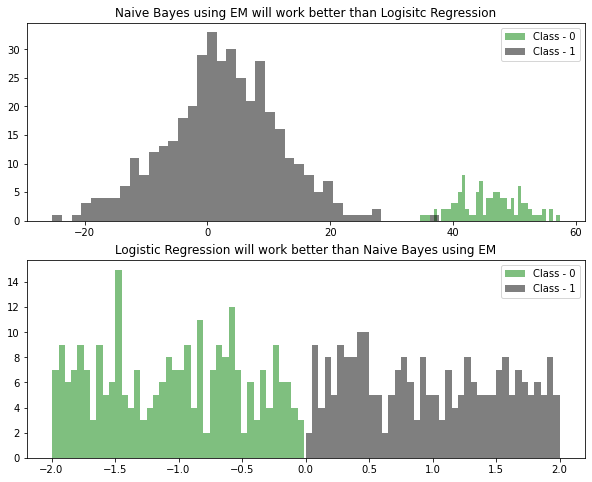

In [14]:
_ , axs = plt.subplots(2, 1)

all_em_0 = [Em_points[i][0] for i in range(len(Em_points)) if Em_points[i][1] == 0]
all_em_1 = [Em_points[i][0] for i in range(len(Em_points)) if Em_points[i][1] == 1]

all_log_0 = [log_points[i][0] for i in range(len(Em_points)) if log_points[i][1] == 0]
all_log_1 = [log_points[i][0] for i in range(len(Em_points)) if log_points[i][1] == 1]

axs[0].hist(all_em_0, 40, facecolor = 'green', alpha = 0.5, label = "Class - 0")
axs[0].hist(all_em_1, 40, facecolor = 'black', alpha = 0.5, label = "Class - 1")

axs[1].hist(all_log_0, 40, facecolor = 'green', alpha = 0.5, label = 'Class - 0')
axs[1].hist(all_log_1, 40, facecolor = 'black', alpha = 0.5, label = 'Class - 1')

axs[0].title.set_text("Naive Bayes using EM will work better than Logisitc Regression")
axs[1].title.set_text("Logistic Regression will work better than Naive Bayes using EM")

axs[0].legend()
axs[1].legend()

plt.show()